In [171]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [270]:
df  = pd.read_csv("train.csv")
df1 = pd.read_csv("test.csv")

In [173]:
df.head()


,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [174]:
df1.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [175]:
df.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [176]:
df1.isna().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [177]:
df.dtypes

ID              int64
Tag            object
Reputation    float64
Answers       float64
Username        int64
Views         float64
Upvotes       float64
dtype: object

In [178]:
# Checking the target variable :
df.corr()

,ID,Reputation,Answers,Username,Views,Upvotes
ID,1.000000,0.008546,0.017448,0.000628,0.017400,0.006328
Reputation,0.008546,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.017448,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,0.000628,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.017400,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.006328,0.266710,0.202033,-0.011970,0.437336,1.000000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:xlabel='Views', ylabel='Upvotes'>

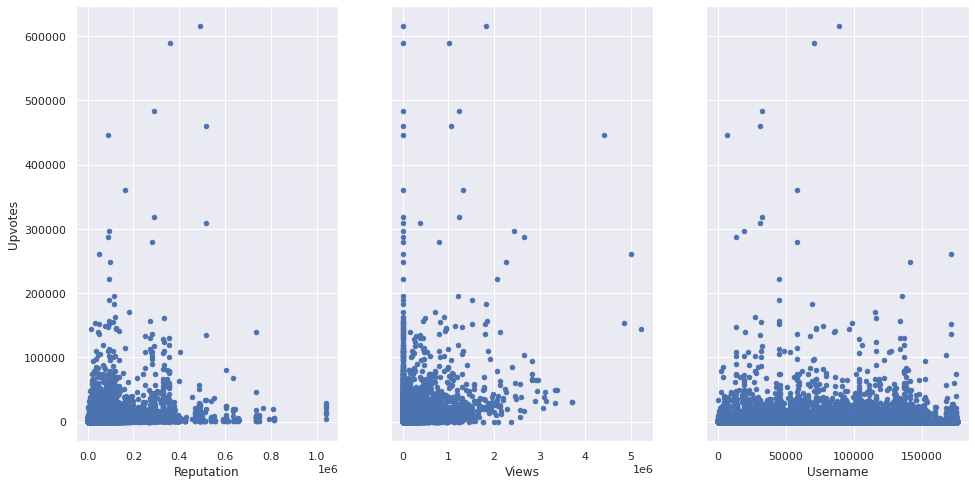

In [179]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Reputation', y='Upvotes', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Answers', y='Upvotes', ax=axs[1])
df.plot(kind='scatter', x='Username', y='Upvotes', ax=axs[2])
df.plot(kind='scatter', x='Views', y='Upvotes', ax=axs[1])

# They are not much related with each other 

<AxesSubplot:>

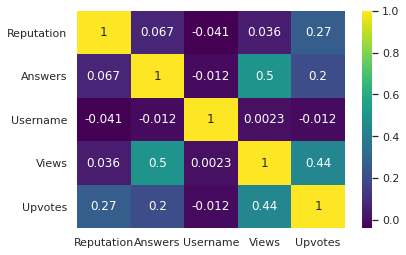

In [180]:
#no highly correlated features
#username is not at all correlated with any feature
#it has a lot of unique values. It can be ignored
import seaborn as sns
corr_matrix=df[['Reputation', 'Answers', 'Username', 'Views', 'Upvotes']].corr()
sns.heatmap(corr_matrix,cmap='viridis',annot=True)

In [181]:
# Separating X and y 
X=df.iloc[:,:6]
y=df.iloc[:,6:7]

del X['Username']
del X['ID']


# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
X['tag']= label_encoder.fit_transform(X['Tag'])
  
X['tag'].unique()

del X['Tag']

X

,Reputation,Answers,Views,tag
0,3942.0,2.0,7855.0,0
1,26046.0,12.0,55801.0,0
2,1358.0,4.0,8067.0,1
3,264.0,3.0,27064.0,0
4,4271.0,4.0,13986.0,1
...,...,...,...,...
330040,36.0,2.0,1063.0,1
330041,1649.0,2.0,23319.0,1
330042,6178.0,2.0,2453.0,1
330043,89.0,2.0,2107.0,4


In [182]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='y ~ X', data=df).fit()
lm.conf_int()

,0,1
Intercept,-411.018215,-365.892457
X[0],0.033196,0.033980
X[1],-40.815593,-33.972212
X[2],0.019674,0.019975
X[3],2.431754,10.935486


In [183]:
lm.pvalues

Intercept    3.496659e-249
X[0]          0.000000e+00
X[1]         1.031319e-101
X[2]          0.000000e+00
X[3]          2.063719e-03
dtype: float64

In [184]:
lm = smf.ols(formula='y ~ X', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 2.829e+04
Date:                Sun, 06 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:02:36   Log-Likelihood:            -3.1216e+06
No. Observations:              330045   AIC:                         6.243e+06
Df Residuals:                  330040   BIC:                         6.243e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -388.4553     11.512    -33.744      0.000    -411.018    -365.892
X[0]           0.0336      0.000    168.030      0.000       0.033       0.034
X[1]         -37.3939      1.746    -21.420      0.000     -40.816     -33.972
X[2]           0.0198   7.69e-05    257.723      0.000       0.020       0.020
X[3]           6.6836      2.169      3.081      0.002       2.432      10.935
==============================================================================
Omnibus:                  1224153.935   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):    1678532490619.947
Skew:                          80.754   Prob(JB):                         0.00
Kurtosis:                   11049.826   Cond. No.                     1.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
# we Dont Have good adjusted r^2

In [186]:
from sklearn.preprocessing import StandardScaler 

scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.004855,Reputation
1,1.341044,Answers
2,1.331697,Views
3,1.005165,tag


In [188]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [189]:
regression = LinearRegression(normalize=True,fit_intercept=True)

regression.fit(x_train,y_train)

LinearRegression(normalize=True)

In [190]:
regression.score(x_train,y_train)

0.24587283396829662

In [191]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

/home/mewaris/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=10, max_iter=100000, normalize=True)

In [192]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0030066872437883724

In [193]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0030066872437883724)

In [194]:
lasso_reg.score(x_test, y_test)

0.2788560411491878

In [195]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.65734353, 0.90222995, 5.15248072, 9.79875777, 7.83664466,
       3.41892945, 2.01288961, 4.90767726, 2.84410342, 8.14744296,
       4.61149293, 6.00419269, 4.74420217, 4.42637288, 9.48281661,
       9.32147449, 4.09761858, 5.85936029, 7.05395194, 3.38795648,
       0.61538183, 7.67801862, 2.89893187, 3.59806578, 9.55579454,
       5.75122376, 7.94930024, 6.58218392, 0.94138828, 5.30522054,
       3.79962174, 0.41659603, 1.86930738, 1.45380216, 5.5762094 ,
       0.76894462, 9.53782936, 3.54845157, 2.14920573, 1.98263617,
       3.39224943, 6.22749276, 3.95596467, 6.48006826, 1.04004434,
       5.31259753, 8.68615157, 4.33527644, 2.14872324, 2.12640911]),
        cv=10, normalize=True)

In [196]:
ridgecv.alpha_

0.41659603301081316

In [197]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.41659603301081316)

In [198]:
ridge_model.score(x_test, y_test)

0.2788560941344398

In [199]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

/home/mewaris/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ElasticNetCV(cv=10)

In [200]:
elasticCV.alpha_

2.933518733318312

In [201]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [202]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=2.933518733318312)

In [203]:
elasticnet_reg.score(x_test, y_test)

0.17181519712890758

In [204]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = regressor.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
n_estimators: The more trees, the less likely the algorithm is to overfit. So try increasing this parameter. The lower this number, the closer the model is to a decision tree, with a restricted feature set.
max_features: You should try reducing this number. This defines how many features each tree is randomly assigned. 
max_depth: This parameter will reduce the complexity of the learned models, lowering over fitting risk. 
min_samples_leaf: Try setting these values greater than one. This has a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each.

In [233]:

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, max_features=4,max_depth = 10,min_samples_leaf=5)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)  

<ipython-input-233-08d61ad7e1a4>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=10, max_features=4, min_samples_leaf=5)

In [234]:
regressor.score(x_train,y_train)
# r2 - train

0.8732118073552034

In [235]:
regressor.score(x_test,y_test)
# r2  - test

0.8747063570620632

In [236]:
adj_r2(x_train,y_train)
# Adjusted r2 on train

0.8732097584848915

In [237]:
adj_r2(x_test,y_test)
# Adjusted r2 on test

0.8747002827341668

In [240]:
ypredict=regressor.predict(x_train)

In [243]:
mean_squared_error(y_train, ypredict)
# MSE ON TRAIN

1569348.2132557242

In [245]:
ypredict1 = regressor.predict(x_test)
mean_squared_error(y_test, ypredict1)
# MSE ON TRAIN

1815377.07234084

In [255]:
# Let prepare test ready 
#del df1['ID']
#del df1['Username']

# Encode labels in column 'species'.
#df1['tag']= label_encoder.fit_transform(df1['Tag'])
#del df1['Tag']

df1

,Reputation,Answers,Views,tag
0,5645.0,3.0,33200.0,0
1,24511.0,6.0,2730.0,1
2,927.0,1.0,21167.0,3
3,21.0,6.0,18528.0,3
4,4475.0,10.0,57240.0,3
...,...,...,...,...
141443,4681.0,4.0,2469.0,4
141444,7782.0,3.0,18998.0,4
141445,435.0,5.0,57048.0,6
141446,176.0,3.0,10193.0,5


In [257]:
from sklearn.preprocessing import StandardScaler 

scaler =StandardScaler()

df1_new = scaler.fit_transform(df1)
df1

array([[-0.0815434 , -0.25573354,  0.04174163, -1.42412492],
       [ 0.59439988,  0.58285319, -0.33750519, -1.02325005],
       [-0.25058296, -0.81479136, -0.10802788, -0.22150031],
       ...,
       [-0.26821065,  0.30332428,  0.3385673 ,  0.9811243 ],
       [-0.27749027, -0.25573354, -0.24461648,  0.58024943],
       [-0.26057915, -0.53526245, -0.21235498, -1.42412492]])

In [263]:
pred_inp =regressor.predict(df1_new)
# Predict on test data
pred_inp = abs(pred_inp)
pred_inp

array([259.88602471,  73.1663537 ,  47.14790262, ...,  77.23218522,
        21.17778549,  29.42454828])

In [272]:
ID=df1['ID']

In [273]:
sub = pd.DataFrame({'ID':ID,'Upvotes':pred_inp})
sub.to_csv("Upvotes_prediction1.csv",index=False)